In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
customers = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
customers.head(100)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,38,12,48,95617,4,0.2,3,0,0,0,0,1,0
96,97,41,15,80,95014,1,5.2,1,0,0,0,0,0,0
97,98,54,28,161,92121,1,2.9,1,0,0,0,0,1,0
98,99,49,23,94,92374,1,0.3,1,0,0,0,0,1,0


In [3]:
#customer.info returs data type of each colunm and checks for null values 
print(customers.info())
#use customer.dtypes to check data type of each colunm 
print(customers.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortg

In [4]:
#data.describe provides statistical summary of each colunm
customers.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
#customer.shape provides shape of dataframe
customers.shape

(5000, 14)

In [6]:
#check for missing values 
customers.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [7]:
#df.describe shows that minimum experience is -3 which shows incorrect imputation of negative work experience as show below
#return rows with negative work experience 
df = customers[customers['Experience'] < 0]
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [8]:
#set ID as DataFrame index
# setting first name as index column 
customers.set_index("ID", inplace = True) 


In [9]:
#replace wrongly entered negative experince entires with the median of the column
med = customers['Experience'].median()
customers.Experience[customers['Experience']<0] = med    
      
customers

C:\Users\UZ0MA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


In [10]:
#df = df1[df1['Experience'] < 0]
#df

df = customers[customers['Experience'] < 0]
df


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,


In [11]:
#get number of unique values in each column
customers.nunique()


Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [12]:
#return number of customers with mortgage = 0 
mort_cust = customers[customers['Mortgage'] == 0]
mort_cust.Mortgage.count()

3462

In [13]:
#return number of customers with monthly credit card spendings equal to zero
zero_credit_cust = customers[customers['CCAvg'] == 0]
zero_credit_cust.CCAvg.count()

106

In [14]:
customers['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [15]:
customers['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [16]:
customers['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [17]:
customers['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [18]:
customers['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [19]:
customers['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

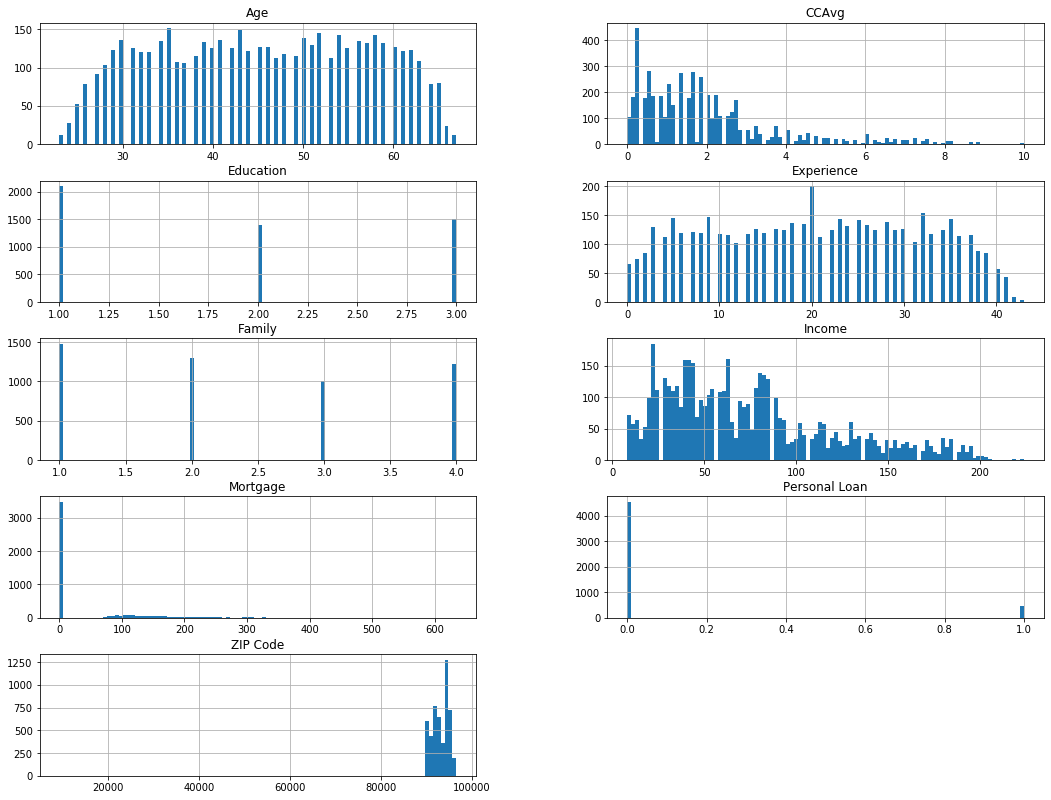

In [20]:
#Plot histogarm columns
#columns = ['Age','CCAvg','Experience','Income','Mortgage']
columns = list(customers)[0:9] # Excluding Outcome column which has only 
customers[columns].hist(stacked=False, bins=100, figsize=(18,40), layout=(14,2)); 


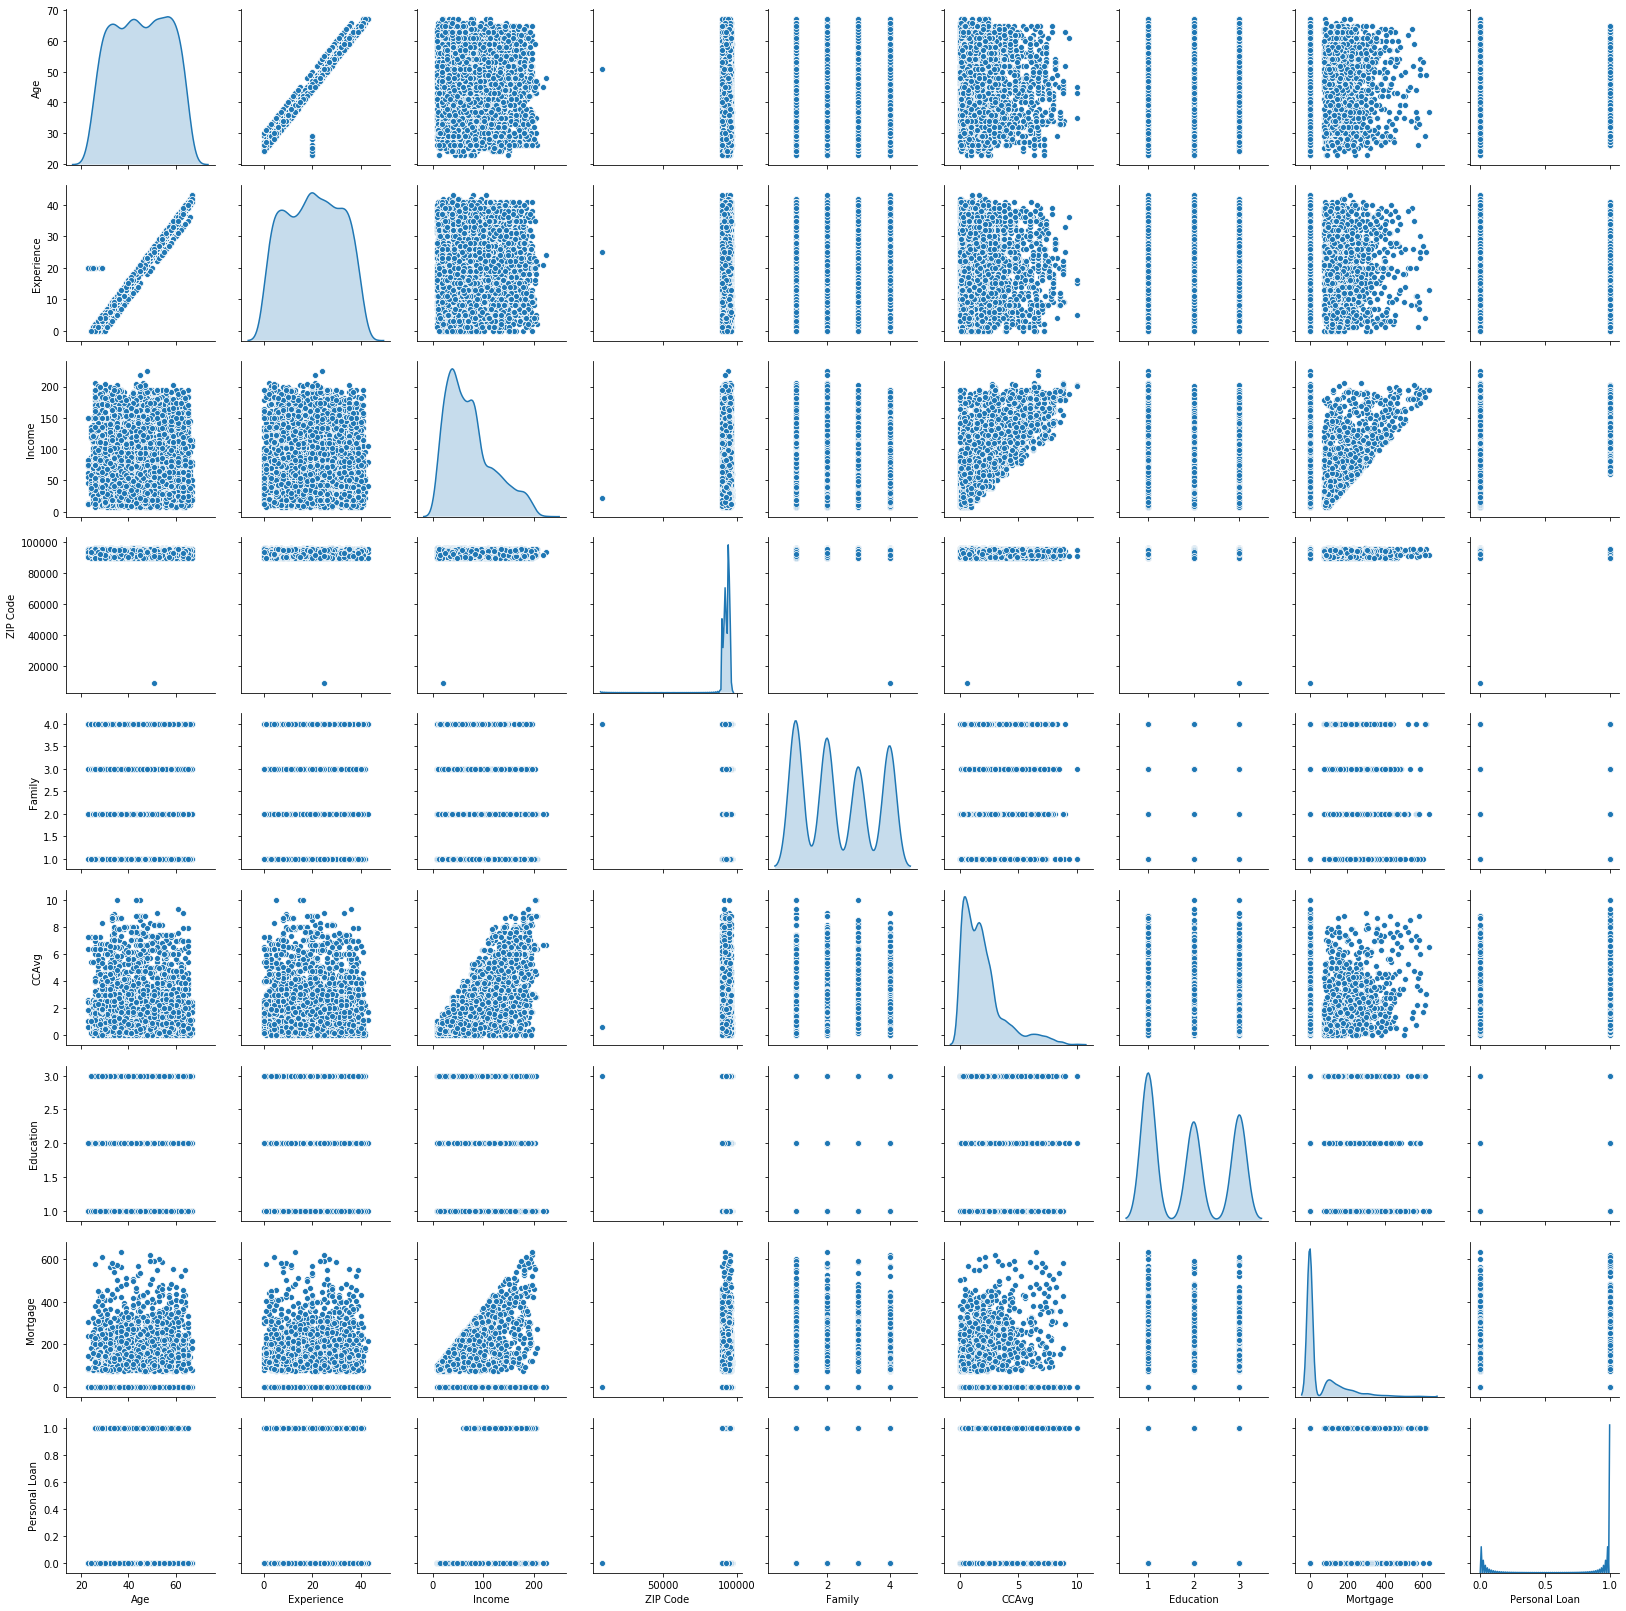

In [21]:
## BiVariate Plots
customers_attr = customers.iloc[:, 0:9]
sns.pairplot(customers_attr,diag_kind='kde' )

In [22]:
customers_attr.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462
ZIP Code,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367
CCAvg,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889
Education,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722
Mortgage,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095
Personal Loan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000


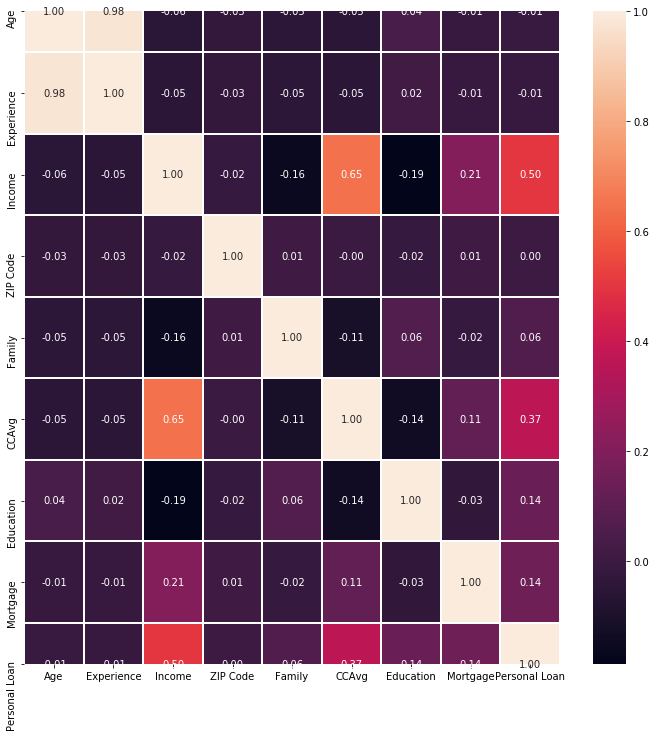

In [23]:
fig,ax = plt.subplots(figsize=(12, 12)) 
sns.heatmap(customers_attr.corr(), ax=ax, annot=True, linewidths=1, fmt= '.2f')
plt.show()

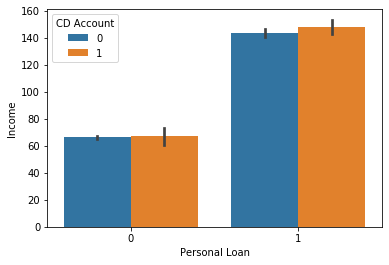

In [24]:
sns.barplot(customers['Personal Loan'], customers['Income'], hue=customers['CD Account']);

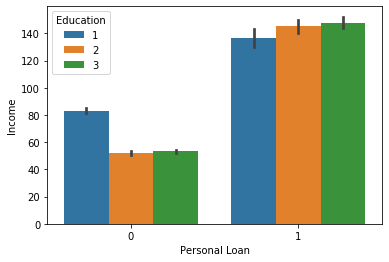

In [25]:
sns.barplot(customers['Personal Loan'], customers['Income'], hue=customers['Education']);

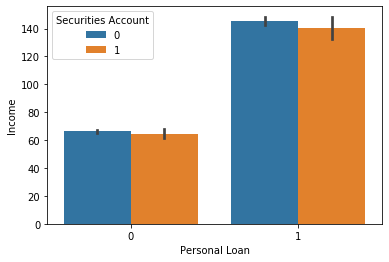

In [26]:
sns.barplot(customers['Personal Loan'], customers['Income'], hue=customers['Securities Account']);

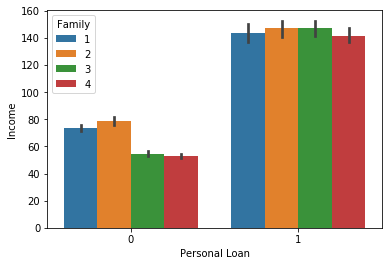

In [27]:
sns.barplot(customers['Personal Loan'], customers['Income'], hue=customers['Family']);

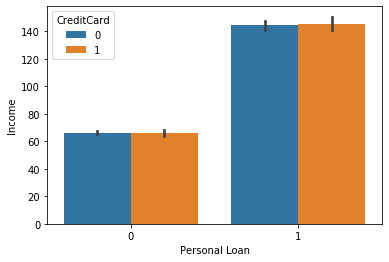

In [28]:
sns.barplot(customers['Personal Loan'], customers['Income'], hue=customers['CreditCard']);

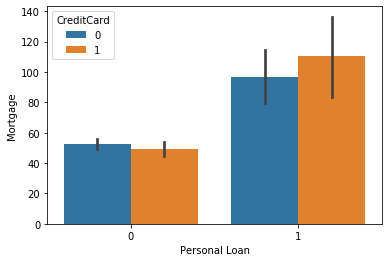

In [29]:
sns.barplot(customers['Personal Loan'], customers['Mortgage'], hue=customers['CreditCard']);

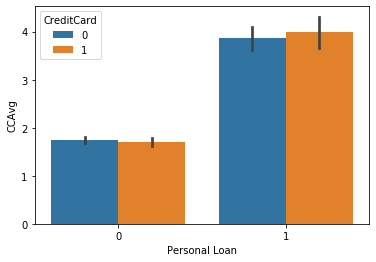

In [30]:
sns.barplot(customers['Personal Loan'], customers['CCAvg'], hue=customers['CreditCard']);

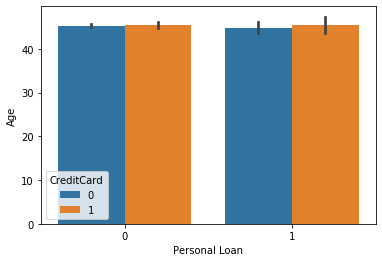

In [31]:
sns.barplot(customers['Personal Loan'], customers['Age'], hue=customers['CreditCard']);

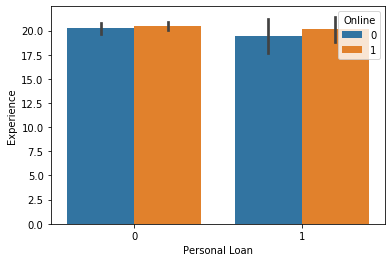

In [32]:
sns.barplot(customers['Personal Loan'], customers['Experience'], hue=customers['Online']);

Observations:-
Age, Experience are normally distributed. 
Most of the customers does not have  mortgage.
There is a strong positve correlation between age and experience.
Apart form age and experience all other attributes do no have strong correlation.  
From the Income to personal loan bar chart, higher income earners are most likely to accept personal loan offer.
Customers  that took personal loan are most likely to have higher Average  spending on credit cards per month and higer mortgage values. 
Credit card,education,securities account does not show strong influnce on the chance of a customer accepting loan.



In [33]:
#logical regression 
# first drop zip code 
customer_cl = customers.drop(columns=['ZIP Code'])
customer_cl

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1,49,4,1.6,1,0,0,1,0,0,0
2,45,19,34,3,1.5,1,0,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0,0
4,35,9,100,1,2.7,2,0,0,0,0,0,0
5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,2,0.3,3,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split

X = customer_cl.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = customer_cl['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,
1335,47,22,35,2,1.3,1,0,0,0,1,0
4769,38,14,39,1,2.0,2,0,0,0,1,0
66,59,35,131,1,3.8,1,0,0,0,1,1
178,29,3,65,4,1.8,2,244,0,0,0,0
4490,39,13,21,3,0.2,2,0,0,0,1,0


In [35]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(customer_cl.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(customer_cl.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [36]:
print("Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(customer_cl.loc[customer_cl['Personal Loan'] == 1]), (len(customer_cl.loc[customer_cl['Personal Loan'] == 1])/len(customer_cl.index)) * 100))
print("Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(customer_cl.loc[customer_cl['Personal Loan'] == 0]), (len(customer_cl.loc[customer_cl['Personal Loan'] == 0])/len(customer_cl.index)) * 100))
print("")
print("Training personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Personal Loan True Values    : 480 (9.60%)
Personal Loan False Values   : 4520 (90.40%)

Training personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

from sklearn.linear_model import LogisticRegression

# Fit the model on train

model = LogisticRegression(solver="liblinear", random_state=42)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.092995  0.083434  0.042552  0.491213  0.141737  1.269588  0.000596   

          7         8         9        10  intercept  
0 -0.933345  3.230298 -0.619571 -1.048735  -7.986693  


In [38]:
model_score = model.score(x_test, y_test)
print(model_score)

0.942


In [39]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='d', xticklabels = [0,1] , yticklabels = [0,1],cmap='coolwarm', annot_kws={'size':16})
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    

Trainig accuracy 0.9497142857142857

Testing accuracy 0.942

Confusion Matrix


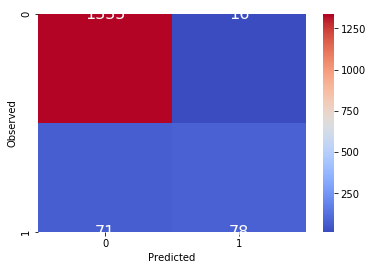

None

Recall: 0.5234899328859061

Precision: 0.8297872340425532

F1 Score: 0.6419753086419753

Roc Auc Score: 0.7558234268426569


In [40]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

The model has a good testing and training accuracy of aprox 0.95.
Recall of 0.56 and precision of 0.83, for this problem domain recall is more important, so a suitable model should have a higher recall value this can be achived by tunning mdel with  out other regression parameters values. 

Trainig accuracy 0.9005714285714286

Testing accuracy 0.8926666666666667

Confusion Matrix


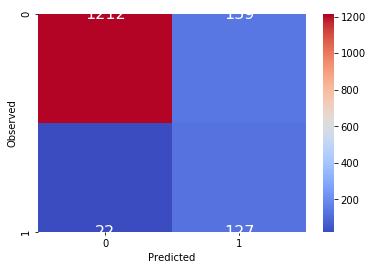

None

Recall: 0.8523489932885906

Precision: 0.4774436090225564

F1 Score: 0.6120481927710844

Roc Auc Score: 0.8747311213667232


In [41]:

# Fit the model on train
model = LogisticRegression(random_state=42,penalty='l2', solver='liblinear', class_weight='balanced',C=1.0)
#model = LogisticRegression(solver="liblinear", random_state=42)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


Business insight 
Confusion matrix means

True Positive (observed=1,predicted=1):

Predicted that the customer will accept personal loan offer and the customer accepted 

False Positive (observed=0,predicted=1):

Predicted that the customer will accept personal loan offer but  the customer did not accept 

True Negative (observed=0,predicted=0):

Predicted that the customer will not accept personal loan offer  and the customer did not accept 

False Negative (observed=1,predicted=0):

Predicted that the customer will not accept personal loan offer but  the customer accepted 

The bank wants to identify customers that are most likely to accept personal loan from it's list of existing customers and target it's personal loan marketing campaign to them.
if the model predicts that a customer will accept personal loan but he does not accept (FP), the cost incured is only the amount spent to market to him . but if a customer that would have accepted a personal loan is not identified and marketed to  (FN) the bank loses the interest on the  loan which is normally higher than the cost of targed marketing per customer. so the cost of missing out on a   potential customer is higher than the cost of marketing to a customer who declines to acept the loan,  recall is more important than precision for this model 
